## Machine Learning

In [1]:
# Import dependencies
from pymongo import MongoClient
from password import connection_string
import pandas as pd
import numpy as np

In [2]:
# connect to MongoDB
myclient = MongoClient(connection_string)

# database
db = myclient['Olympics_Machine_Learning_Project_Data']

In [3]:
# final_df collection
final_df_collection = db["final_df"]

In [4]:
# Take data off of MongoDB
final_df = pd.DataFrame(list(final_df_collection.find()))

In [5]:
# Getting the first 5 rows of final_df
final_df.head()

,_id,Host City,Year,Team,Season,Season (Binary),Latitude,Longitude,Host,GDP Total,...,Total Events,Total Countries,GDP per Capita,Team Disciplines,Team Events,Team Size,Bronze,Silver,Gold,Total Medals
0,60a03e0375b9fcc5fa8278b7,Stockholm,1912,Finland,Summer,1,61.924110,25.748151,0,9.707610e+09,...,102.0,28.0,3274.000000,10,49,164,9.0,8.0,9.0,26.0
1,60a03e0375b9fcc5fa8278b8,Albertville,1992,USA,Winter,0,37.090240,-95.712891,0,9.520302e+12,...,57.0,64.0,37045.330120,12,56,148,2.0,4.0,5.0,11.0
2,60a03e0375b9fcc5fa8278b9,Lillehammer,1994,Norway,Winter,0,60.472024,8.468946,1,2.097252e+11,...,61.0,67.0,48305.780704,10,48,87,5.0,10.0,8.0,23.0
3,60a03e0375b9fcc5fa8278ba,Squaw Valley,1960,Norway,Winter,0,60.472024,8.468946,0,7.775834e+10,...,27.0,30.0,21705.000000,6,17,29,0.0,3.0,3.0,6.0
4,60a03e0375b9fcc5fa8278bb,Atlanta,1996,Netherlands,Summer,1,52.132633,5.291266,0,5.611086e+11,...,271.0,197.0,36053.428086,19,94,239,10.0,5.0,4.0,19.0


In [6]:
# Dropping an uneccessary column
final_df.drop(['_id', 'Bronze', 'Silver', 'Gold', 'Host City', 'Year', 'Team', 'Season'], axis=1, inplace=True)

In [7]:
# Getting the first 5 rows of final_df
final_df.head()

,Season (Binary),Latitude,Longitude,Host,GDP Total,Population,Total Disciplines,Males,Females,Total Athletes,Total Events,Total Countries,GDP per Capita,Team Disciplines,Team Events,Team Size,Total Medals
0,1,61.924110,25.748151,0,9.707610e+09,2965061.0,18.0,162.0,2.0,2407.0,102.0,28.0,3274.000000,10,49,164,26.0
1,0,37.090240,-95.712891,0,9.520302e+12,256990608.0,12.0,98.0,50.0,1801.0,57.0,64.0,37045.330120,12,56,148,11.0
2,0,60.472024,8.468946,1,2.097252e+11,4341616.0,12.0,66.0,21.0,1737.0,61.0,67.0,48305.780704,10,48,87,23.0
3,0,60.472024,8.468946,0,7.775834e+10,3582508.0,8.0,25.0,4.0,665.0,27.0,30.0,21705.000000,6,17,29,6.0
4,1,52.132633,5.291266,0,5.611086e+11,15563252.0,37.0,137.0,102.0,10318.0,271.0,197.0,36053.428086,19,94,239,19.0


In [8]:
# Making the datasets
X = final_df.iloc[:, :16].values
y = final_df.iloc[:, 16].values

In [13]:
final_df.iloc[:, :16]

,Season (Binary),Latitude,Longitude,Host,GDP Total,Population,Total Disciplines,Males,Females,Total Athletes,Total Events,Total Countries,GDP per Capita,Team Disciplines,Team Events,Team Size
0,1,61.924110,25.748151,0,9.707610e+09,2965061.0,18.0,162.0,2.0,2407.0,102.0,28.0,3274.000000,10,49,164
1,0,37.090240,-95.712891,0,9.520302e+12,256990608.0,12.0,98.0,50.0,1801.0,57.0,64.0,37045.330120,12,56,148
2,0,60.472024,8.468946,1,2.097252e+11,4341616.0,12.0,66.0,21.0,1737.0,61.0,67.0,48305.780704,10,48,87
3,0,60.472024,8.468946,0,7.775834e+10,3582508.0,8.0,25.0,4.0,665.0,27.0,30.0,21705.000000,6,17,29
4,1,52.132633,5.291266,0,5.611086e+11,15563252.0,37.0,137.0,102.0,10318.0,271.0,197.0,36053.428086,19,94,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,0,23.634501,-102.552784,0,1.843781e+12,114092961.0,15.0,1.0,0.0,2566.0,86.0,82.0,16160.341705,1,2,1
3602,1,46.818188,8.227512,0,5.552906e+10,3621067.0,25.0,1.0,0.0,2008.0,110.0,22.0,15335.000000,1,1,1
3603,1,51.919438,19.145136,0,8.565258e+10,25562652.0,18.0,1.0,0.0,2407.0,102.0,28.0,3350.692446,1,1,1
3604,1,-8.874217,125.727539,0,1.060519e+10,1055428.0,41.0,0.0,1.0,10942.0,302.0,204.0,10048.232241,1,1,1


In [9]:
from sklearn.model_selection import train_test_split

# Splitting the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Training and testing the model
regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<AxesSubplot:xlabel='feature'>

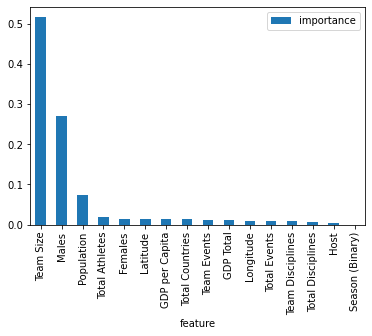

In [15]:
importances = pd.DataFrame({'feature':final_df.iloc[:, :16].columns,'importance':np.round(regressor.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [16]:
regressor.score(X_train, y_train)
acc_regressor = round(regressor.score(X_train, y_train) * 100, 2)
print(round(acc_regressor,2,), "%")

97.96 %


In [17]:
from sklearn.model_selection import cross_val_score

rf = regressor
scores = cross_val_score(rf, X_train, y_train, cv=10)

In [18]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74992565 0.80289372 0.90087518 0.82528146 0.88275754 0.87522569
 0.80945771 0.87044872 0.83558585 0.91939414]
Mean: 0.8471845654985446
Standard Deviation: 0.04914105780802026


In [19]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.5389571665356385


In [20]:
# Getting the accuracy of the model
accuracy = regressor.score(X_test, y_test)
accuracy

0.8597431318253694

In [21]:
# Creating a test DataFrame
usa_test = {'Season (Binary)': 0, 'Latitude': 37.0902, 'Longitude': 95.7129, 'Host': 0, 'GDP Total': 20580000000000,
           'Population': 327200000, 'Total Disciplines': 15, 'Males': 134, 'Females': 107,
           'Total Athletes': 2922, 'Total Events': 102, 'Team Disciplines': 15, 'Team Events': 97,
           'Total Countries': 92, 'GDP per Capita': 62897.3105134, 'Team Size': 241}

usa_test_df = pd.DataFrame(usa_test, index=[0])

In [22]:
# Viewing the test DataFrame
usa_test_df

,Season (Binary),Latitude,Longitude,Host,GDP Total,Population,Total Disciplines,Males,Females,Total Athletes,Total Events,Team Disciplines,Team Events,Total Countries,GDP per Capita,Team Size
0,0,37.0902,95.7129,0,20580000000000,327200000,15,134,107,2922,102,15,97,92,62897.310513,241


In [26]:
# Testing the model
y_pred = regressor.predict(usa_test_df)

In [27]:
# Not bad. The actual result was 23 medals
print(y_pred)

[33.284]
